# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='MEDV'), data.MEDV, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
from sklearn.metrics import r2_score

print(f'R2 train score: {r2_score(y_train, y_pred_train)}')
print(f'R2 test score: {r2_score(y_test, y_pred_test)}')

R2 train score: 0.7305355010885488
R2 test score: 0.7496484780275521


## 4. Calculate and print mean squared error for both the training and the testing set.

In [9]:
from sklearn.metrics import mean_squared_error

print(f'MSE train score: {mean_squared_error(y_train, y_pred_train)}')
print(f'MSE test score: {mean_squared_error(y_test, y_pred_test)}')

MSE train score: 21.561956967420784
MSE test score: 25.397719144781085


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [20]:
from sklearn.metrics import mean_absolute_error

print(f'MAE train score: {mean_absolute_error(y_train, y_pred_train)}')
print(f'MAE test score: {mean_absolute_error(y_test, y_pred_test)}')

MAE train score: 0.058333333333333334
MAE test score: 0.03333333333333333


## Classification Model Evaluation

In [11]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='class'), data['class'], test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [18]:
from sklearn.linear_model import LogisticRegression

lo_model = LogisticRegression(solver='lbfgs')
lo_model.fit(X_train, y_train)
y_pred_train = lo_model.predict(X_train)
y_pred_test = lo_model.predict(X_test)

/home/xhoan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [19]:
from sklearn.metrics import accuracy_score

print(f'Accuracy train score: {accuracy_score(y_train, y_pred_train)}')
print(f'Accuracy test score: {accuracy_score(y_test, y_pred_test)}')

Accuracy train score: 0.9416666666666667
Accuracy test score: 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [21]:
from sklearn.metrics import balanced_accuracy_score

print(f'Accuracy train score: {balanced_accuracy_score(y_train, y_pred_train)}')
print(f'Accuracy test score: {balanced_accuracy_score(y_test, y_pred_test)}')

Accuracy train score: 0.9430894308943089
Accuracy test score: 0.9629629629629629


## 10. Calculate and print the precision score for both the training and the testing set.

In [27]:
from sklearn.metrics import precision_score

print(f'Accuracy train score: {precision_score(y_train, y_pred_train, average="weighted")}')
print(f'Accuracy test score: {precision_score(y_test, y_pred_test, average="weighted")}')

Accuracy train score: 0.9431917862838916
Accuracy test score: 0.9700000000000001


## 11. Calculate and print the recall score for both the training and the testing set.

In [29]:
from sklearn.metrics import recall_score

print(f'Accuracy train score: {recall_score(y_train, y_pred_train, average="weighted")}')
print(f'Accuracy test score: {recall_score(y_test, y_pred_test, average="weighted")}')

Accuracy train score: 0.9416666666666667
Accuracy test score: 0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [30]:
from sklearn.metrics import f1_score

print(f'Accuracy train score: {f1_score(y_train, y_pred_train, average="weighted")}')
print(f'Accuracy test score: {f1_score(y_test, y_pred_test, average="weighted")}')

Accuracy train score: 0.9415884834946637
Accuracy test score: 0.9665634674922601


## 13. Generate confusion matrices for both the training and the testing set.

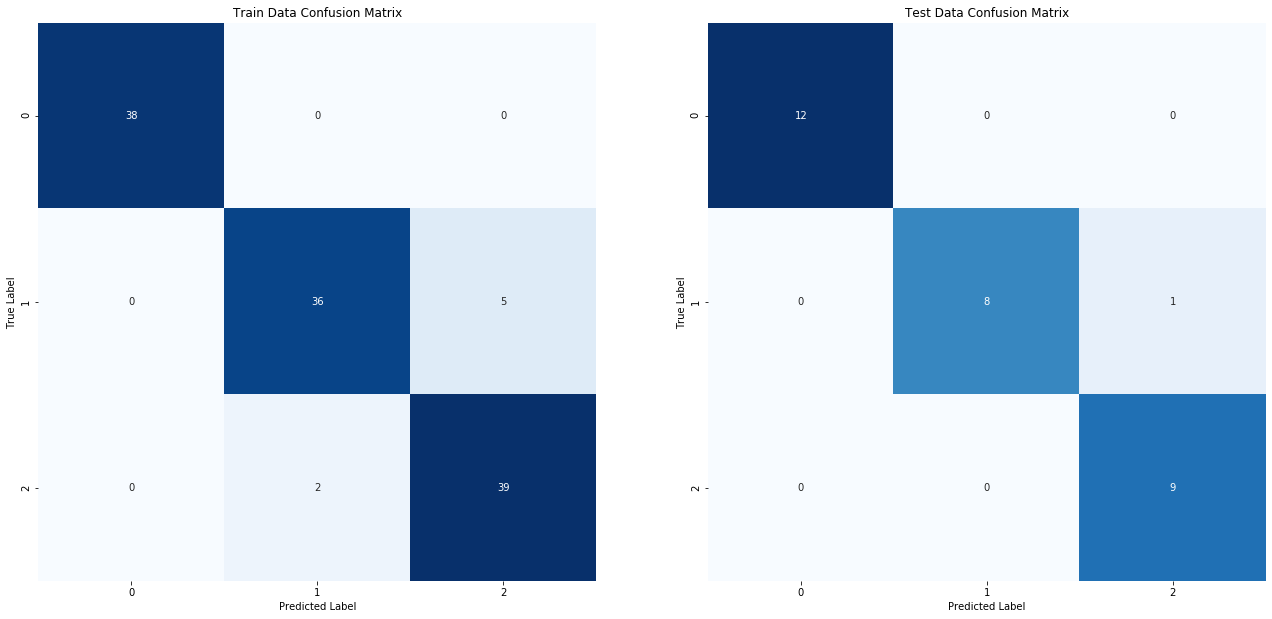

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

cm_train = confusion_matrix(y_train, y_pred_train) 
cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(22,12))

plt.subplot(121)
sns.heatmap(cm_train, cbar=False, square=True, annot=True, cmap='Blues', fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Train Data Confusion Matrix');

plt.subplot(122)
sns.heatmap(cm_test, cbar=False, square=True, annot=True, cmap='Blues', fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Test Data Confusion Matrix');

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.